## Data Preprocessing Stage

#### import the library

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### import dataset

In [49]:
df = pd.read_csv('/content/drive/MyDrive/Cloud Lab/ML Projects/2. Loan Approval Prediction/train_dataset_loan_approval_prediction.csv')

In [50]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
df.shape

(614, 13)

In [52]:
df.size

7982

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


#### treating with null values

In [54]:
# using fillna and interpolate we are going to perform cleaning the data

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
# we using forward fill in null places

df.fillna(method = 'ffill', inplace = True)

In [56]:
# again we using backward fill in null places

df.fillna(method = 'bfill', inplace = True)

In [57]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

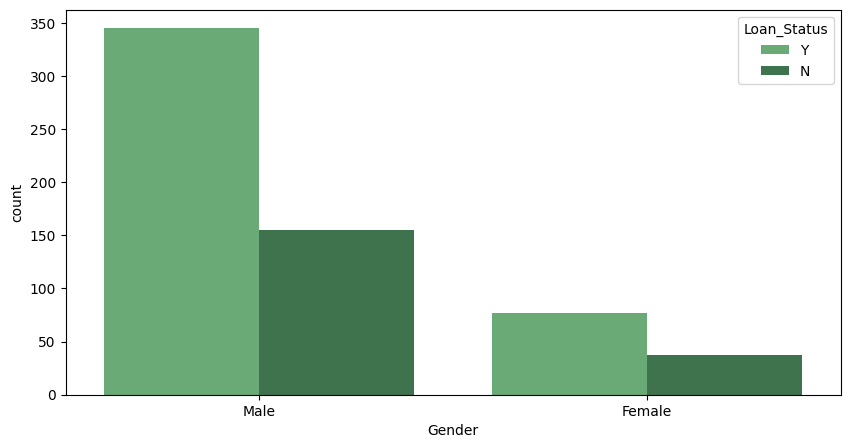

In [58]:
# lets visualize the how many members got loan approval or not based on gender.

plt.figure(figsize = (10,5))
sns.countplot(x = 'Gender', data = df, hue = 'Loan_Status', palette = 'Greens_d')
plt.show()

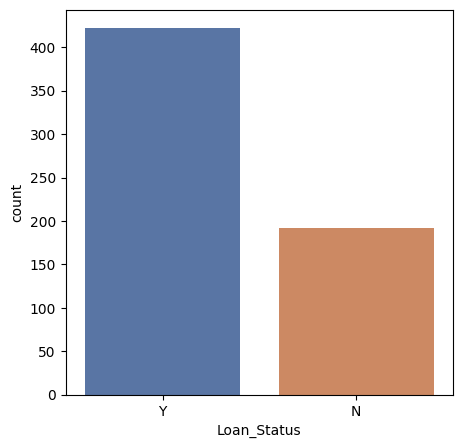

In [59]:
# lets visualize the how much ratio about loan approved or not approved

plt.figure(figsize=(5,5))
sns.countplot(x='Loan_Status', data = df, palette = 'deep')
plt.show()

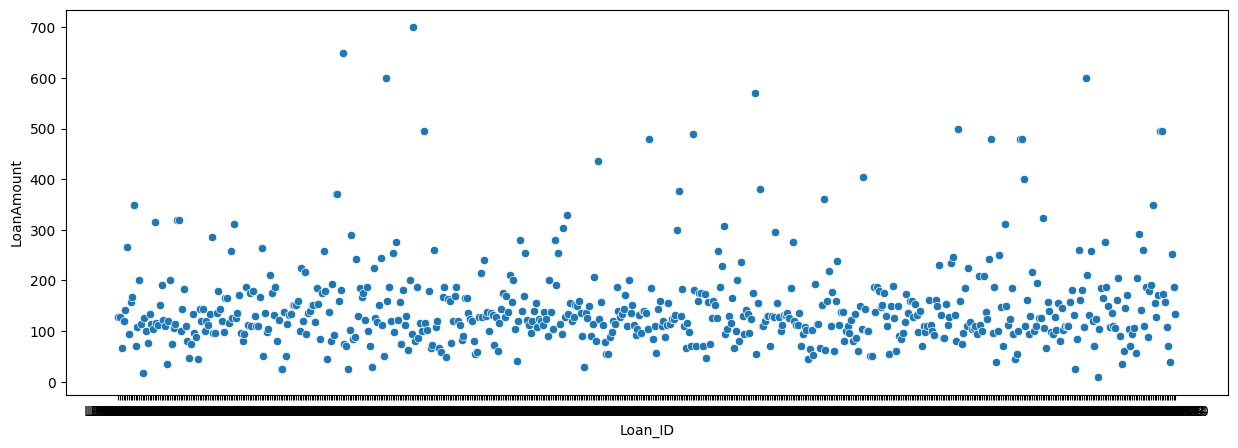

In [60]:
# lets visualize the how much amount we distributed to the customers

plt.figure(figsize=(15,5))
sns.scatterplot(x = 'Loan_ID', y = 'LoanAmount', data = df)
plt.show()

<Figure size 1000x500 with 0 Axes>

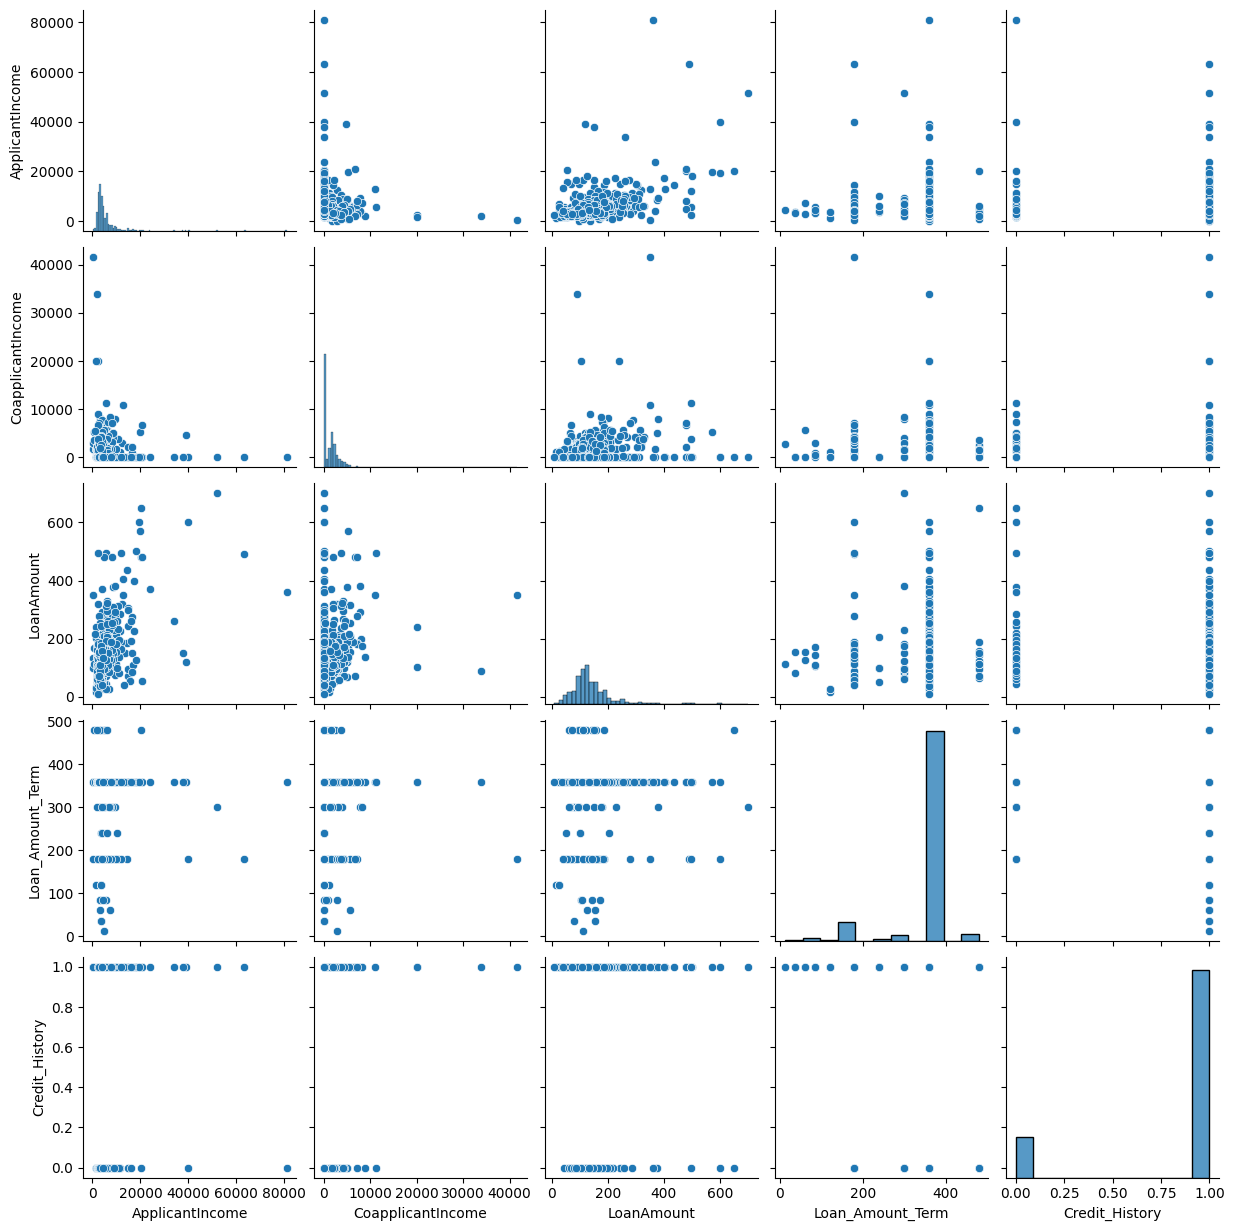

In [61]:
# lets visualize the how data is spread

plt.figure(figsize=(10,5))
sns.pairplot(df)
plt.show()

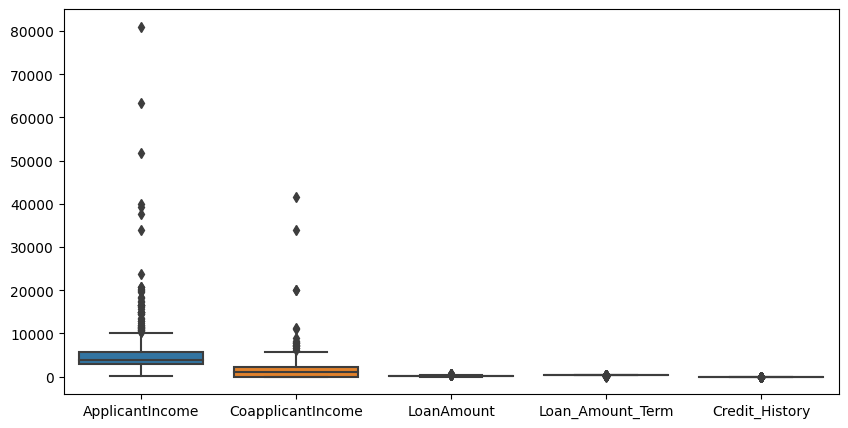

In [62]:
# lets check how outliers are formed in below visualization

plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.show()

In [63]:
# lets remove unwanted columns in dataframe

df.drop('Dependents', axis=1, inplace=True)
df.drop('ApplicantIncome', axis=1, inplace = True)
df.drop('CoapplicantIncome', axis=1, inplace = True)
df.drop('LoanAmount', axis=1, inplace = True)
df.drop('Loan_Amount_Term', axis=1, inplace = True)
df.drop('Credit_History', axis =1, inplace = True)

In [64]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y


In [65]:
# encoding using get_dummies OneHotEncoder

df1 = pd.get_dummies(df, columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'])

df1.head()

,Loan_ID,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,0,1,1,0,1,0,1,0,0,0,1,0,1
1,LP001003,0,1,0,1,1,0,1,0,1,0,0,1,0
2,LP001005,0,1,0,1,1,0,0,1,0,0,1,0,1
3,LP001006,0,1,0,1,0,1,1,0,0,0,1,0,1
4,LP001008,0,1,1,0,1,0,1,0,0,0,1,0,1


In [66]:
df1.columns

Index(['Loan_ID', 'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [67]:
df1.drop('Gender_Female', axis=1, inplace = True)
df1.drop('Married_No', axis=1, inplace = True)
df1.drop('Education_Graduate', axis=1, inplace=  True)
df1.drop('Self_Employed_No', axis=1, inplace = True)
df1.drop('Property_Area_Rural', axis = 1, inplace = True)
df1.drop('Loan_Status_N', axis=1, inplace = True)

In [68]:
df1.head()

,Loan_ID,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,1,0,0,0,0,1,1
1,LP001003,1,1,0,0,0,0,0
2,LP001005,1,1,0,1,0,1,1
3,LP001006,1,1,1,0,0,1,1
4,LP001008,1,0,0,0,0,1,1


#### splitting dataset into train set and test set

In [69]:
df1.columns

Index(['Loan_ID', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_Y'],
      dtype='object')

In [70]:
X = df1[['Gender_Male','Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes',
         'Property_Area_Semiurban','Property_Area_Urban']].values

y = df1['Loan_Status_Y'].values

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression

l_regression = LogisticRegression()

# train the logistic regression model with X_train, y_train
l_regression.fit(X_train, y_train)

# predict the accuracy by using test set
y_pred_lr = l_regression.predict(X_test)

In [73]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

# train the decision tree classifier model with X_train, y_train
dt_classifier.fit(X_train, y_train)

# predict the accuracy by using test set
y_pred_dt = dt_classifier.predict(X_test)

#### accuracy of these two models ( Logistic regression and DecisionTree Classifier)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


from sklearn.metrics import classification_report

print('Logistic Regression')

print('Accuracy_Score : ',accuracy_score(y_test, y_pred_lr))
print('Precision_Score : ',precision_score(y_test, y_pred_lr))
print('Recall is : ',recall_score(y_test, y_pred_lr))
print('F1 Score is : ',f1_score(y_test, y_pred_lr))

print('')

print('classification report is : ',classification_report(y_test, y_pred_lr))
print('confusion matrix is : ',confusion_matrix(y_test, y_pred_lr))

Logistic Regression
Accuracy_Score :  0.6504065040650406
Precision_Score :  0.6504065040650406
Recall is :  1.0
F1 Score is :  0.7881773399014779

classification report is :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123

confusion matrix is :  [[ 0 43]
 [ 0 80]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
print('Decision Tree Classifier')
print('Accuracy_Score : ',accuracy_score(y_test, y_pred_dt))
print('Precision_Score : ',precision_score(y_test, y_pred_dt))
print('Recall is : ', recall_score(y_test, y_pred_dt))
print('F1 Score is : ',f1_score(y_test, y_pred_dt))

print('')

print('classification report is : ',classification_report(y_test, y_pred_dt))
print('confusion matrix is : ',confusion_matrix(y_test, y_pred_dt)  )

Decision Tree Classifier
Accuracy_Score :  0.6504065040650406
Precision_Score :  0.6581196581196581
Recall is :  0.9625
F1 Score is :  0.781725888324873

classification report is :                precision    recall  f1-score   support

           0       0.50      0.07      0.12        43
           1       0.66      0.96      0.78        80

    accuracy                           0.65       123
   macro avg       0.58      0.52      0.45       123
weighted avg       0.60      0.65      0.55       123

confusion matrix is :  [[ 3 40]
 [ 3 77]]


In [76]:
print('Logistic Regression')
print('accuracy score is : ',accuracy_score(y_test, y_pred_lr))
print('precision score is : ',precision_score(y_test, y_pred_lr))
print('recall is : ',recall_score(y_test, y_pred_lr))
print('f1 score is : ', f1_score(y_test, y_pred_lr))
print("***********************************************************************************************************")

print('Decision Tree Classifier')
print('accuracy score is : ',accuracy_score(y_test, y_pred_dt))
print('precision score is : ', precision_score(y_test, y_pred_dt))
print('recall is : ',recall_score(y_test, y_pred_dt))
print('f1 score is : ',f1_score(y_test, y_pred_dt))

Logistic Regression
accuracy score is :  0.6504065040650406
precision score is :  0.6504065040650406
recall is :  1.0
f1 score is :  0.7881773399014779
***********************************************************************************************************
Decision Tree Classifier
accuracy score is :  0.6504065040650406
precision score is :  0.6581196581196581
recall is :  0.9625
f1 score is :  0.781725888324873


#### final accuracy of the two models


In [77]:
print('For Logistic Regression : ')
print('Accuracy : ',accuracy_score(y_test, y_pred_lr))

print('-------------------------------------')

print('For Decision Tree Classifier')
print('Accuracy : ', accuracy_score(y_test, y_pred_dt))


For Logistic Regression : 
Accuracy :  0.6504065040650406
-------------------------------------
For Decision Tree Classifier
Accuracy :  0.6504065040650406
